# **Introdução IA em Python**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

# **Primeiro Programa Python com IA**

In [1]:
# Programa python usando
# a biblioteca Numpy para
# realizar algumas operações básicas

import numpy as np 

# Criando duas matriz de duas dimensões
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

# Criando duas matrizes de um dimensão
v = np.array([9, 10])
w = np.array([11, 12])

# Produto interno de vetores
print(np.dot(v, w), "\n")

# Produto de matriz e vetor
print(np.dot(x, v), "\n")

# Matriz e produto da matriz
print(np.dot(x, y))


219 

[29 67] 

[[19 22]
 [43 50]]


**Exemplo com Scikit-learn**

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
#carregar dados da iris
dataset = datasets.load_iris()

In [4]:
#ajustar um modelo CART aos dados
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

DecisionTreeClassifier()


In [5]:
#fazer previsões
expected = dataset.target
predicted = model.predict(dataset.data)

In [6]:
#resumir o ajuste do modelo
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


# **Algoritmo KNN**

In [17]:
# livros [ didático, poesia, ficção, auto-ajuda, economia]
'''
característica 1 = O livro é de fácil leitura? (nota de 0 a 5)
característica 2 = O livro é difícil? (nota de 0 a 5)
característica 3 = O livro é cheio de fórmulas? (nota de 0 a 5)
característica 4 = O livro contém rimas? (nota de 0 a 5)
característica 5 = O livro é utópico? (nota de 0 a 5)  
'''
livro1=[0,5,5,0,0]
livro2=[0,5,0,0,0]
livro3=[5,5,0,0,0]
livro4=[0,0,5,5,0]
#classes que sao atribuidas ao livro didatico
isDidatico=[0,1,1,0]

X=[livro1,livro2,livro3,livro4]
y=isDidatico

In [12]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4a1552b9621548f61a24c3315093f2f3c4c5cda1957e8fd820cda91b04920529
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
novoLivro=[[0,2,4,0,0]]
result=neigh.predict(novoLivro)
print(result)
if(result==0):
  print("É didático")
else:
  print("não é didático")

[0]
É didático


# **Exemplo Extra**

fonte: https://scikit-learn.org/0.15/auto_examples/neighbors/plot_classification.html

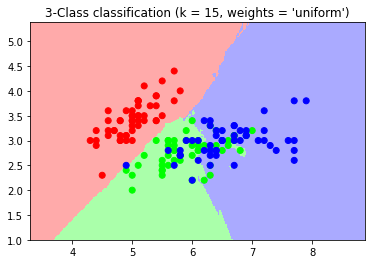

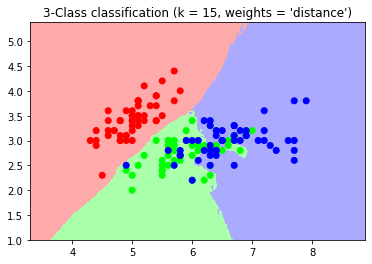

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()